In [470]:
#import matplotlib
import matplotlib.pyplot as mp
import numpy as np
import metpy.calc as mpc
import xarray as xr
import pandas as pd
import datetime as dt
#from scam_func import *


In [471]:
#### SCRIPT TO READ IN SCAM OUTPUT AND MAKE SOME PLOTS ####
###### IOP file info. ######
#scam_file_in = './FSCAM.T42_T42.SAS.001.cam.h0.2013-06-10-43200.nc'   # input template (default: 20min tstep)
#scam_file_in = './FSCAM.T42_T42.SAS.002.cam.h0.2013-06-10-43200.nc'   # input template (5min tstep)
#scam_file_in = './FSCAM.T42_T42.SAS.003.cam.h0.2013-06-10-43200.nc'   # input template (1min tstep)
#scam_file_in = './FSCAM.T42_T42.SAS.007.cam.h0.2013-06-10-43200.nc'   # input template, fixed q for SCAM (double,kg/kg), shflx/lhflx prescribed (default: 20min tstep)
#scam_file_in = './FSCAM.T42_T42.SAS.008.cam.h0.2013-06-10-43200.nc'   # as 007, but with omega,divT and divq set to zero.
#scam_file_in = './FSCAM.T42_T42.SAS.011b.cam.h0.2013-06-10-43200.nc'   # as 007, but with omega,divT and divq set to zero.


scam_file_num = '011e'  # For detailed single case analysis
scam_file_nums = [11,12,13,14]  # For comparisons

scam_file_pre = "FSCAM.T42_T42.SAS."
scam_file_suf = ".cam.h0.2013-06-10-43200.nc"

zoffset = 6.


#### PLOTTING ####

pvars_ts1d = ['TS','PBLH','LHFLX','SHFLX','PRECC','PRECL','FLNS','CAPE'] # D profile timeseries plots
pvars_ts2d = ['T','Q','RELHUM','CLOUD','ZMDQ','ZMDT','STEND_CLUBB','RVMTEND_CLUBB'] # 2D profile timeseries plots
pvars_snap = ['Q','T','TH','THL']  # Snapshot plotting vars

tsnaps = np.array([6.,8.,10.,12.,14.,16])     # Time of snapshots (local time)

####### GRAPHICS ########
#mp.interactive(True)
#%matplotlib qt
%matplotlib inline

#### CONSTANTS #####

r_gas = 287.   # Specific gas constant for dry air
cp_air = 1004.6 # Specific heat for dry air
Lv = 2.501e6      # Latent heat of vaporization

r_cp = r_gas/cp_air    # r/cp
grav = 9.81     # Gravity ave.
p0 = 100000. # pref 


###### DERIVED VARS #######
scam_files_in = [ scam_file_pre+("{:0>3d}".format(x))+scam_file_suf for x in scam_file_nums]
scam_file_in = scam_file_pre+scam_file_num+scam_file_suf 

print('Reading in data from file = '+scam_file_in)


scam_in = xr.open_dataset(scam_file_in,engine='netcdf4')
xr.set_options(keep_attrs=True)

time = scam_in.time

#print(1000*86400*(scam_in.PRECC.values+scam_in.PRECL.values))

hour_frac = time.time.dt.hour+time.time.dt.minute/60.-zoffset
print(hour_frac)

vplevs = scam_in['lev'].transpose()


Reading in data from file = FSCAM.T42_T42.SAS.011e.cam.h0.2013-06-10-43200.nc
<xarray.DataArray (time: 316)>
array([ 6.      ,  6.033333,  6.066667, ..., 16.433333, 16.466667, 16.5     ])
Coordinates:
  * time     (time) object 2013-06-10 12:00:00 ... 2013-06-10 22:30:00


---- PLOTTING 1D TIME PLOTS ------>>>   Surface temperature (radiative)  --amin/cmax -->  280.29126 321.83386


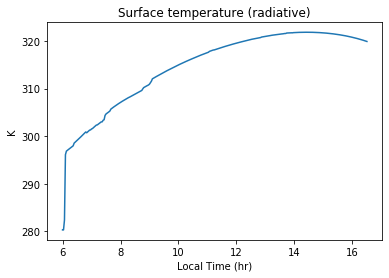

---- PLOTTING 1D TIME PLOTS ------>>>   PBL height  --amin/cmax -->  183.53183 1828.848


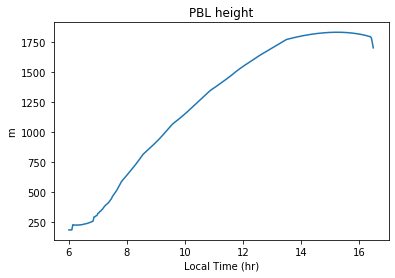

---- PLOTTING 1D TIME PLOTS ------>>>   Surface latent heat flux  --amin/cmax -->  0.0 375.15


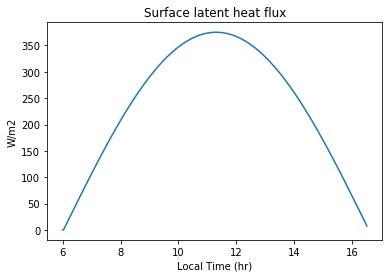

---- PLOTTING 1D TIME PLOTS ------>>>   Surface sensible heat flux  --amin/cmax -->  0.0 100.46


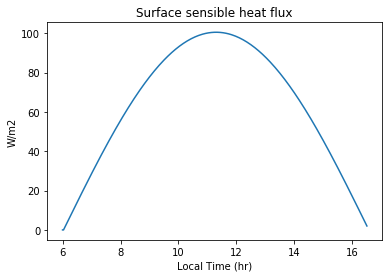

---- PLOTTING 1D TIME PLOTS ------>>>   Convective precipitation rate (liq + ice)  --amin/cmax -->  0.0 6.5594573


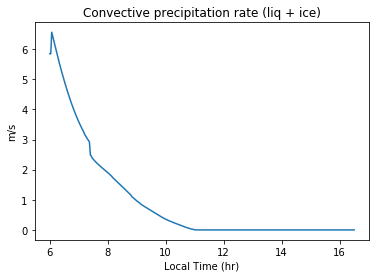

---- PLOTTING 1D TIME PLOTS ------>>>   Large-scale (stable) precipitation rate (liq + ice)  --amin/cmax -->  0.0 7.0134125e-09


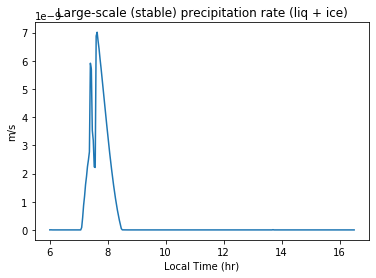

---- PLOTTING 1D TIME PLOTS ------>>>   Net longwave flux at surface  --amin/cmax -->  -51.254883 119.36073


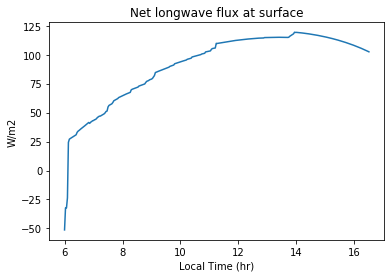

---- PLOTTING 1D TIME PLOTS ------>>>   Convectively available potential energy  --amin/cmax -->  0.0 544.69104


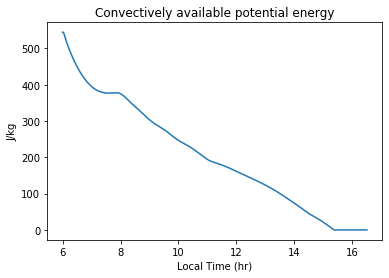

In [472]:
#########################
#   1D Time plotting    #
#########################
## Plot Variables ##



#plot1d_dic = {}

#plot1d_dic['LHFLX']  = [1.,0.,300]
#plot1d_dic['SHFLX']  = [1.,0., 300]
#plot1d_dic['TS']     = [1., 290., 300.]
#plot1d_dic['PBLH']   = [1., 0., 1000.]
#plot1d_dic['PRECL']  = [86400.*1000., 0., 10.]
#plot1d_dic['PRECC']  = [86400.*1000., 0., 10.]
#plot1d_dic['FLNS']   = [1., 200., 800.]
#plot1d_dic['CAPE']   = [1., 0., 800.]

#plot1d_df = pd.DataFrame(plot1d_dic,index=['vscale','cmin','cmax'])
#plot1d_df


## 1D PLOTS ##
#mp.rcParams['figure.dpi'] = 50

#for var in pvars_ts1d:
 
#    vscale = plot1d_dic[var][0] ; cmin = plot1d_dic[var][1] ; cmax = plot1d_dic[var][2]
    
#    with xr.set_options(keep_attrs=True): 
#        pvar = vscale*scam_in[var].isel(lat=0,lon=0)

        
    # Fig. setup
#    print('---- PLOTTING 1D TIME PLOTS ------>>>  ',pvar.attrs['long_name'],' --amin/cmax --> ',  np.min(pvar.values),np.max(pvar.values))
    
    # Plot
#    mp.plot(hour_frac,pvar)
  
    
    # Axes stuff
#    mp.xlabel("Local Time (hr)")
#    mp.ylabel(pvar.attrs['units'])
#    mp.title(pvar.attrs['long_name'])
    
#    mp.show()

---- PLOTTING 2D TIME/HEIGHT PLOTS------>>>   Temperature  -- cmin/cmax -->  185.70712 316.73846
---- PLOTTING 2D TIME/HEIGHT PLOTS------>>>   Specific humidity  -- cmin/cmax -->  6.303963e-07 0.017774392
---- PLOTTING 2D TIME/HEIGHT PLOTS------>>>   Relative humidity  -- cmin/cmax -->  0.0006101428 72.92925
---- PLOTTING 2D TIME/HEIGHT PLOTS------>>>   Cloud fraction  -- cmin/cmax -->  0.0 0.23620689
---- PLOTTING 2D TIME/HEIGHT PLOTS------>>>   Q tendency - Zhang-McFarlane moist convection  -- cmin/cmax -->  -9.872941e-08 1.0323391e-08
---- PLOTTING 2D TIME/HEIGHT PLOTS------>>>   T tendency - Zhang-McFarlane moist convection  -- cmin/cmax -->  -0.00021345547 0.00016424575
---- PLOTTING 2D TIME/HEIGHT PLOTS------>>>   Static energy tendency  -- cmin/cmax -->  -0.15680738 0.3864672
---- PLOTTING 2D TIME/HEIGHT PLOTS------>>>   Water vapor tendency  -- cmin/cmax -->  -1.03424206e-07 5.205131e-07


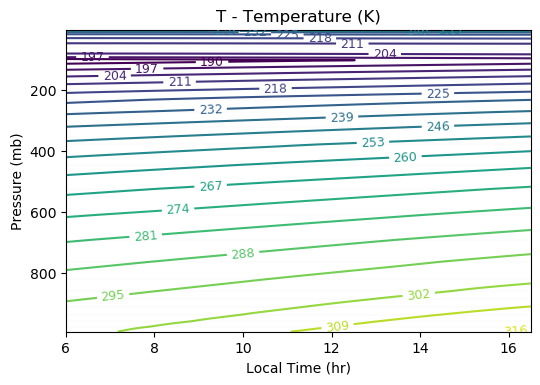

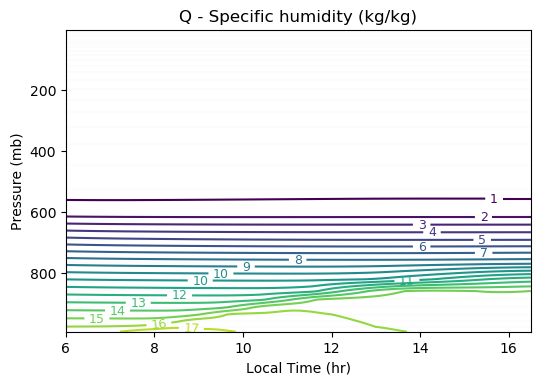

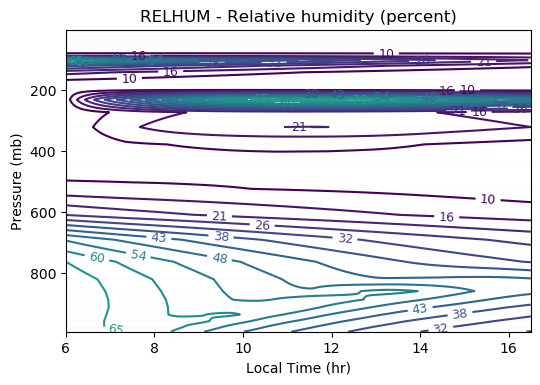

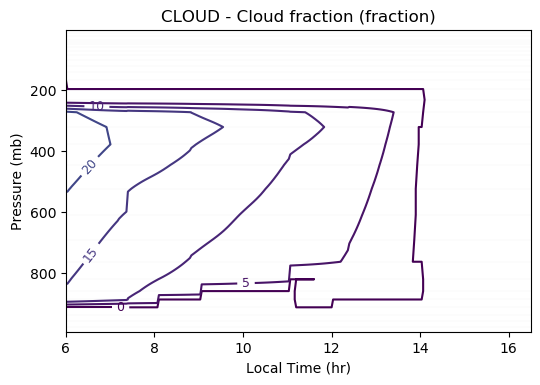

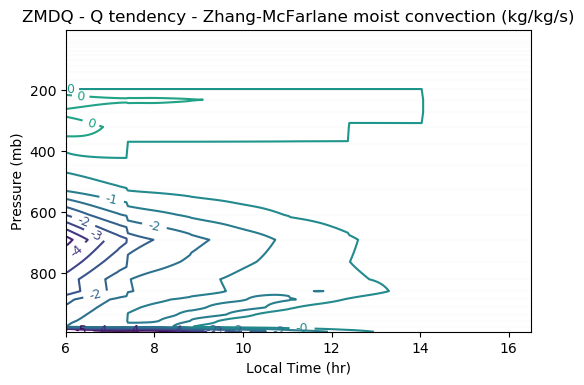

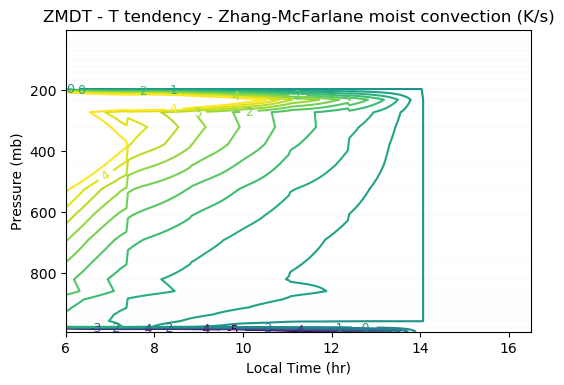

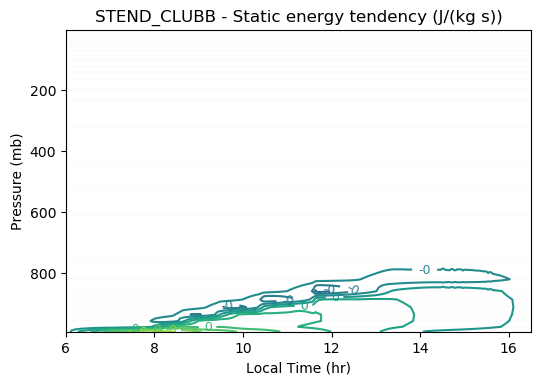

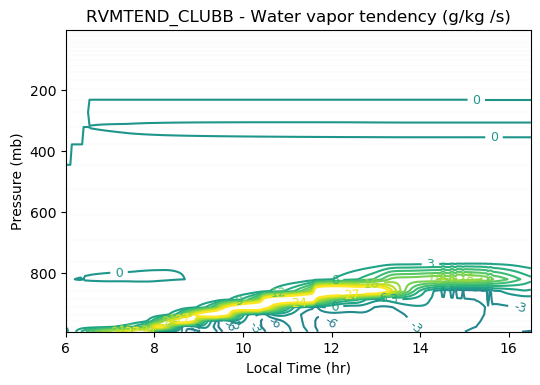

In [473]:
##############################
# 2D Time/Height Plotting info.
#############################
plot2d_dic = {}

plot2d_dic['T']      = [1.,190.,330.]
plot2d_dic['RELHUM'] = [1.,10., 120.]
plot2d_dic['CLOUD']  = [100., 0., 100.]
plot2d_dic['Q']      = [1000., 1., 20.]
plot2d_dic['WPRTP_CLUBB'] = [1., 0., 200.]
plot2d_dic['WPTHLP_CLUBB'] = [1., 0., 200.]
plot2d_dic['WP3_CLUBB']      = [1., -1., 1.]
plot2d_dic['STEND_CLUBB']    = [1., -.5, 0.55]
plot2d_dic['RVMTEND_CLUBB']  = [1000.*86400, -30., 30.]
plot2d_dic['DCQ']  = [1000., -5., 5.]
plot2d_dic['THL']  = [1., 210, 310.]
plot2d_dic['ZMDT']  = [86400., -5., 5.]
plot2d_dic['ZMDQ']  = [86400.*1000., -5., 5.]

plot2d_df = pd.DataFrame(plot2d_dic,index=['vscale','cmin','cmax'])
plot2d_df

nclevs = 20 # Number of contour levels


## TIME/HEIGHT PLOTTING ##
mp.rcParams['figure.dpi'] = 100

for var in pvars_ts2d:
   
    vscale = plot2d_dic[var][0] ; cmin = plot2d_dic[var][1] ; cmax = plot2d_dic[var][2]
    
    pvar = scam_in[var].isel(lat=0,lon=0).transpose()  
    
    print('---- PLOTTING 2D TIME/HEIGHT PLOTS------>>>  ',pvar.attrs['long_name'],' -- cmin/cmax --> ',  np.min(pvar.values),np.max(pvar.values))
    plevels = np.arange(cmin,cmax,(cmax-cmin)/nclevs)

    fig,ax = mp.subplots()

    p_tp = ax.contour(hour_frac,scam_in[pvar.dims[0]],vscale*pvar,levels=plevels)
    ax.invert_yaxis()
    mp.clabel(p_tp, fontsize=9, inline=1,fmt='%1.0f')
    mp.hlines(scam_in[pvar.dims[0]], min(hour_frac), max(hour_frac), linestyle="dotted",lw=0.04)
    ax.set_xlabel("Local Time (hr)")
    ax.set_ylabel("Pressure (mb)")
    ax.set_title(var+" - "+pvar.attrs['long_name']+" ("+pvar.attrs['units']+")")
    
    del pvar

------ SNAPSHOTS ------>>>   Q  ---  Specific humidity  -- min/max -->  6.303963e-07 0.017774392
kg/kg


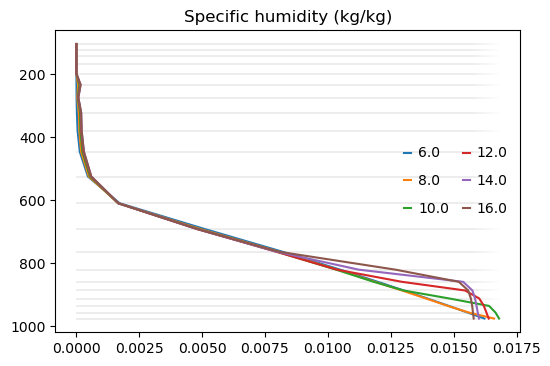

------ SNAPSHOTS ------>>>   T  ---  Temperature  -- min/max -->  185.70712 316.73846
K


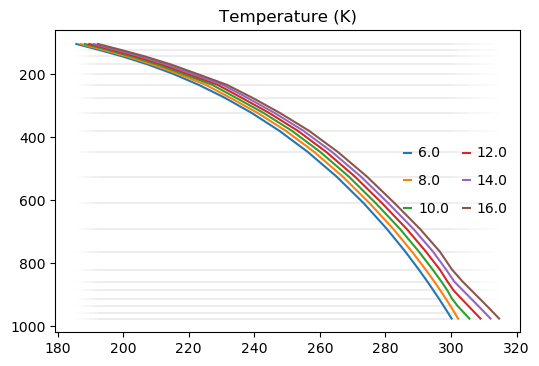

------ SNAPSHOTS ------>>>   TH  ---  Potential Temperature  -- min/max -->  301.70383834994664 1293.4788796287628
K


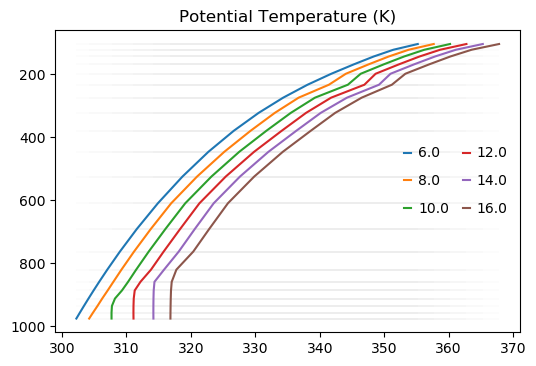

------ SNAPSHOTS ------>>>   THL  ---  Liq. Water Potential Temperature  -- min/max -->  259.5373741428557 1293.4450125827339
K


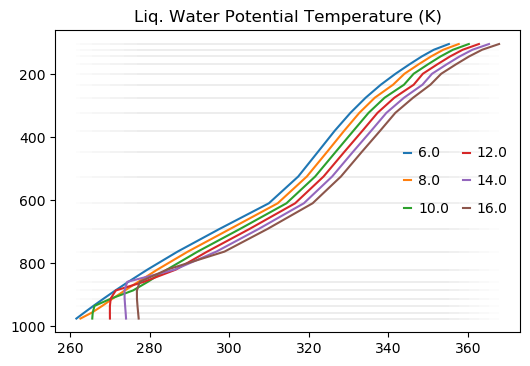

In [474]:
############################
# Hour Snapshots on same plot
############################

ntsnaps = tsnaps.size

## Loop Variables ##

# Level ranges 

pptop = 100.
ipplevs = np.where(vplevs>=pptop) ; ip0 = np.min(ipplevs) ; ip1 = np.max(ipplevs)
vplevs_v = vplevs[ip0:ip1]

for var in pvars_snap:

    pvar = None
    
    if var =='TH': pvar = scam_in['T'].isel(lat=0,lon=0)*(0.01*p0/vplevs)**r_cp ; pvar.attrs['long_name'] = "Potential Temperature" ; pvar.attrs['units'] = "K" ; theta = pvar
    if var =='THL': pvar = theta-(theta/scam_in['T'].isel(lat=0,lon=0))*(Lv/cp_air)*scam_in['Q'].isel(lat=0,lon=0) ; pvar.attrs['long_name'] = "Liq. Water Potential Temperature"

    if pvar is None :  # Set pvar if not already.
        pvar = scam_in[var].isel(lat=0,lon=0)
    
    print('------ SNAPSHOTS ------>>>  ',var,' --- ',pvar.attrs['long_name'],' -- min/max --> ',  np.min(pvar.values),np.max(pvar.values))
 
    # Plot several different functions...
    
    labelspacing = []
    labels = []
        
    ## Loop Snapshot Times ##
    
    for ii in range(0, ntsnaps): 
        itt = np.min(np.where(hour_frac==tsnaps[ii]))
        pvar_v = pvar[itt,ip0:ip1]
        mp.plot(pvar_v,vplevs_v)
        
#        if var not in ['T','TH','THL']: mp.vlines(0, 0, scam_in[pvar.dims[1]].max(), linestyle="dashed",lw=1)
        mp.hlines(vplevs_v, min(pvar_v), max(pvar_v), linestyle="dotted",lw=0.04)
        
######### END of snapshot loop #########

# Legend
    mp.title(pvar.attrs['long_name']+' ('+pvar.attrs['units']+')')
    mp.legend(labels=tsnaps, ncol=2, loc="center right", 
            columnspacing=1.0, labelspacing=1, 
            handletextpad=0.5, handlelength=0.5, frameon=False)
    print(pvar.attrs['units'])
    mp.gca().invert_yaxis()
    mp.show()
    del pvar
   
    
    

In [475]:

<b>Current Issues</b> <br>
-Too much instability early on <br>
-Too much heating
-Too much drying from the large-scale now
-Lower stratosphere specificaions <br>
-Land surface spin-up (repeating diurnal cycles) <br>
-Aerosol specifications <br>


SyntaxError: invalid syntax (<ipython-input-475-7e0408bec84d>, line 2)

In [ ]:
### PLOTTING FUNCTIONS ###


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"

In [ ]:
#########################
#   1D Time plotting    #
#########################
## Plot Variables ##


def plot1d_ts_scam

    plot1d_dic = {}

    plot1d_dic['LHFLX']  = [1.,0.,300]
    plot1d_dic['SHFLX']  = [1.,0., 300]
    plot1d_dic['TS']     = [1., 290., 300.]
    plot1d_dic['PBLH']   = [1., 0., 1000.]
    plot1d_dic['PRECL']  = [86400.*1000., 0., 10.]
    plot1d_dic['PRECC']  = [86400.*1000., 0., 10.]
    plot1d_dic['FLNS']   = [1., 200., 800.]
    plot1d_dic['CAPE']   = [1., 0., 800.]

    plot1d_df = pd.DataFrame(plot1d_dic,index=['vscale','cmin','cmax'])
    plot1d_df


## 1D PLOTS ##
#mp.rcParams['figure.dpi'] = 50

    for var in pvars_ts1d:
 
        vscale = plot1d_dic[var][0] ; cmin = plot1d_dic[var][1] ; cmax = plot1d_dic[var][2]
    
        with xr.set_options(keep_attrs=True): 
        pvar = vscale*scam_in[var].isel(lat=0,lon=0)

        
        # Fig. setup
        print('---- PLOTTING 1D TIME PLOTS ------>>>  ',pvar.attrs['long_name'],' --amin/cmax --> ',  np.min(pvar.values),np.max(pvar.values))
    
        # Plot
        mp.plot(hour_frac,pvar)
  
    
    # Axes stuff
    mp.xlabel("Local Time (hr)")
    mp.ylabel(pvar.attrs['units'])
    mp.title(pvar.attrs['long_name'])